## Import packages

In [1]:
import allel
import pandas as pd
import zarr
import numpy as np
import vcf_processing_functions as vpf
from variables import *
import sys
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import os
import itertools

#%load_ext rpy2.ipython

In [5]:
chrom='22'
anc1='Denisova'
anc2='Denisova'
data1='HGDP'
data2='HGDP'
mean_prob=0.5

for i in range(len(lpopulat)):
    for j in range(i, len(lpopulat)):
        pop1 = lpopulat[i]
        pop2 = lpopulat[j]
        data = pd.read_csv("{}/{}/intersection/int_{}_{}_{}_{}_{}_{}_{}.txt".format(results,anc1,data1,pop1,anc1,data2,pop2,anc2,mean_prob), sep='\t', header=None)
        data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
        print(pop1,pop2)
        print(data.query('chr == "chr{}"'.format(chrom)))
        if data.query('chr == "chr{}"'.format(chrom)).shape[0]:
            print('Ja')

Burusho Burusho
       chr     start       end       ind1       ind2
368  chr22  17813000  17873000  HGDP00338  HGDP00338
369  chr22  22904000  22944000  HGDP00371  HGDP00371
370  chr22  24223000  24554000  HGDP00445  HGDP00445
371  chr22  24743000  24890000  HGDP00417  HGDP00417
372  chr22  25885000  25935000  HGDP00341  HGDP00341
373  chr22  26074000  26125000  HGDP00372  HGDP00372
374  chr22  27029000  27052000  HGDP00382  HGDP00382
375  chr22  33501000  33574000  HGDP00388  HGDP00388
376  chr22  34951000  34977000  HGDP00407  HGDP00407
377  chr22  36368000  36380000  HGDP00364  HGDP00364
378  chr22  47037000  47042000  HGDP00438  HGDP00438
379  chr22  47772000  47874000  HGDP00428  HGDP00428
380  chr22  48811000  48864000  HGDP00445  HGDP00445
381  chr22  49352000  49410000  HGDP00392  HGDP00392
Ja
Burusho Hazara
       chr     start       end       ind1       ind2
119  chr22  22904000  22943000  HGDP00371  HGDP00100
120  chr22  36368000  36380000  HGDP00364  HGDP00104
121  chr22  

Ja
Burusho Balochi
       chr     start       end       ind1       ind2
147  chr22  22904000  22941000  HGDP00371  HGDP00094
148  chr22  26075000  26125000  HGDP00372  HGDP00090
149  chr22  27029000  27042000  HGDP00382  HGDP00056
150  chr22  34951000  34977000  HGDP00407  HGDP00058
151  chr22  36368000  36380000  HGDP00364  HGDP00080
Ja
Burusho Brahui
       chr     start       end       ind1       ind2
152  chr22  22904000  22944000  HGDP00371  HGDP00023
153  chr22  36368000  36380000  HGDP00364  HGDP00039
Ja
Burusho Makrani
       chr     start       end       ind1       ind2
127  chr22  22904000  22944000  HGDP00371  HGDP00135
128  chr22  36368000  36380000  HGDP00364  HGDP00134
129  chr22  48816000  48861000  HGDP00445  HGDP00153
Ja
Burusho Kalash
       chr     start       end       ind1       ind2
132  chr22  27031000  27052000  HGDP00382  HGDP00279
Ja
Burusho Pathan
       chr     start       end       ind1       ind2
166  chr22  24223000  24246000  HGDP00445  HGDP00262
167  ch

Ja
Hazara Bedouin
      chr     start       end       ind1       ind2
71  chr22  36368000  36393000  HGDP00104  HGDP00607
72  chr22  48509000  48531000  HGDP00109  HGDP00609
73  chr22  48532000  48536000  HGDP00115  HGDP00609
Ja
Hazara Palestinian
      chr     start       end       ind1       ind2
70  chr22  27394000  27396000  HGDP00129  HGDP00741
71  chr22  36368000  36379000  HGDP00104  HGDP00690
72  chr22  39558000  39618000  HGDP00125  HGDP00729
73  chr22  48509000  48531000  HGDP00109  HGDP00691
74  chr22  48532000  48537000  HGDP00115  HGDP00691
Ja
Hazara Druze
      chr     start       end       ind1       ind2
64  chr22  27378000  27398000  HGDP00129  HGDP00563
65  chr22  36368000  36392000  HGDP00104  HGDP00586
66  chr22  48509000  48529000  HGDP00109  HGDP00602
Ja
Hazara Russian
       chr     start       end       ind1       ind2
97   chr22  27394000  27396000  HGDP00129  HGDP00898
98   chr22  48377000  48397000  HGDP00109  HGDP00881
99   chr22  48479000  48500000  HGDP000

      chr     start       end       ind1       ind2
72  chr22  47625000  47676000  HGDP01297  HGDP01332
73  chr22  47820000  47874000  HGDP01305  HGDP01328
74  chr22  48423000  48448000  HGDP01298  HGDP01331
75  chr22  48463000  48476000  HGDP01297  HGDP01328
76  chr22  48512000  48548000  HGDP01299  HGDP01329
77  chr22  48592000  48608000  HGDP01297  HGDP01330
Ja
Uygur Adygei
      chr     start       end       ind1       ind2
49  chr22  48508000  48530000  HGDP01299  HGDP01400
Ja
Uygur Basque
      chr     start       end       ind1       ind2
32  chr22  48423000  48440000  HGDP01298  HGDP01366
Ja
Uygur Sardinian
      chr     start       end       ind1       ind2
35  chr22  48352000  48397000  HGDP01300  HGDP01075
36  chr22  48509000  48532000  HGDP01299  HGDP01066
Ja
Uygur BergamoItalian
      chr     start       end       ind1       ind2
28  chr22  48528000  48548000  HGDP01299  HGDP01149
Ja
Uygur Tuscan
      chr     start       end       ind1       ind2
24  chr22  48508000  4854

       chr     start       end       ind1       ind2
105  chr22  34102000  34113000  HGDP00655  HGDP00781
106  chr22  39276000  39316000  HGDP00491  HGDP00784
107  chr22  44290000  44307000  HGDP00664  HGDP00972
108  chr22  47099000  47152000  HGDP00664  HGDP00814
109  chr22  47192000  47200000  HGDP00655  HGDP00977
110  chr22  47774000  47795000  HGDP00660  HGDP00775
111  chr22  47842000  47874000  HGDP00661  HGDP00817
112  chr22  48593000  48608000  HGDP00663  HGDP00777
113  chr22  48637000  48669000  HGDP00664  HGDP00782
114  chr22  48783000  48802000  HGDP00660  HGDP00822
115  chr22  48758000  48782000  HGDP00660  HGDP00776
116  chr22  49055000  49079000  HGDP00787  HGDP00786
117  chr22  49389000  49400000  HGDP00661  HGDP00778
118  chr22  49402000  49408000  HGDP00661  HGDP00974
Ja
Bougainville She
      chr     start       end       ind1       ind2
73  chr22  44264000  44268000  HGDP00656  HGDP01332
74  chr22  44288000  44296000  HGDP00664  HGDP01332
75  chr22  47836000  47874000

Ja
PapuanHighlands Miao
      chr     start       end       ind1       ind2
49  chr22  39276000  39304000  HGDP00554  HGDP01198
50  chr22  48458000  48562000  HGDP00552  HGDP01196
51  chr22  48593000  48608000  HGDP00554  HGDP01194
Ja
PapuanHighlands Han
      chr     start       end       ind1       ind2
76  chr22  35647000  35674000  HGDP00553  HGDP00777
77  chr22  39276000  39304000  HGDP00554  HGDP00784
78  chr22  39486000  39507000  HGDP00548  HGDP00820
79  chr22  46752000  46759000  HGDP00549  HGDP00814
80  chr22  47099000  47121000  HGDP00549  HGDP00814
81  chr22  47139000  47152000  HGDP00551  HGDP00814
82  chr22  47288000  47314000  HGDP00553  HGDP00814
83  chr22  48458000  48470000  HGDP00552  HGDP00785
84  chr22  48533000  48548000  HGDP00552  HGDP00820
85  chr22  48477000  48531000  HGDP00552  HGDP00812
86  chr22  48590000  48608000  HGDP00554  HGDP00777
Ja
PapuanHighlands She
      chr     start       end       ind1       ind2
49  chr22  39485000  39507000  HGDP00548  HGDP

PapuanSepik Lahu
      chr     start       end       ind1       ind2
56  chr22  48469000  48548000  HGDP00541  HGDP01326
57  chr22  49055000  49079000  HGDP00546  HGDP01317
58  chr22  49390000  49406000  HGDP00540  HGDP01326
Ja
PapuanSepik Miao
      chr     start       end       ind1       ind2
45  chr22  26929000  26945000  HGDP00545  HGDP01192
46  chr22  39276000  39315000  HGDP00546  HGDP01198
47  chr22  44264000  44265000  HGDP00543  HGDP01190
48  chr22  48469000  48565000  HGDP00541  HGDP01196
49  chr22  48610000  48612000  HGDP00546  HGDP01194
50  chr22  48646000  48670000  HGDP00546  HGDP01195
Ja
PapuanSepik Han
      chr     start       end       ind1       ind2
74  chr22  26929000  26951000  HGDP00545  HGDP00812
75  chr22  35646000  35674000  HGDP00545  HGDP00777
76  chr22  39276000  39316000  HGDP00546  HGDP00784
77  chr22  39486000  39545000  HGDP00542  HGDP00820
78  chr22  39555000  39618000  HGDP00542  HGDP00972
79  chr22  46752000  46759000  HGDP00547  HGDP00814
80  chr2

      chr     start       end       ind1       ind2
45  chr22  48421000  48443000  HGDP00998  HGDP01331
46  chr22  48463000  48467000  HGDP01014  HGDP01328
47  chr22  48512000  48530000  HGDP01010  HGDP01329
Ja
Karitiana Adygei
      chr     start       end       ind1       ind2
35  chr22  48509000  48530000  HGDP01010  HGDP01400
Ja
Karitiana Basque
      chr     start       end       ind1       ind2
25  chr22  48419000  48440000  HGDP00998  HGDP01366
Ja
Karitiana Sardinian
      chr     start       end       ind1       ind2
33  chr22  48352000  48397000  HGDP00998  HGDP01075
34  chr22  48509000  48530000  HGDP01010  HGDP01066
Ja
Karitiana BergamoItalian
      chr     start       end       ind1       ind2
21  chr22  48528000  48530000  HGDP01010  HGDP01149
Ja
Karitiana Tuscan
      chr     start       end       ind1       ind2
25  chr22  48509000  48530000  HGDP01010  HGDP01164
Ja
Karitiana French
      chr     start       end       ind1       ind2
33  chr22  48465000  48467000  HGDP01

      chr     start       end       ind1       ind2
21  chr22  48419000  48440000  HGDP00852  HGDP01366
Ja
Surui Sardinian
      chr     start       end       ind1       ind2
27  chr22  48351000  48397000  HGDP00852  HGDP01075
28  chr22  48509000  48532000  HGDP00837  HGDP01066
Ja
Surui BergamoItalian
      chr     start       end       ind1       ind2
22  chr22  48528000  48538000  HGDP00837  HGDP01149
Ja
Surui Tuscan
      chr     start       end       ind1       ind2
18  chr22  48509000  48538000  HGDP00837  HGDP01164
Ja
Surui French
      chr     start       end       ind1       ind2
27  chr22  48509000  48538000  HGDP00837  HGDP00531
Ja
Surui Orcadian
      chr     start       end       ind1       ind2
24  chr22  48509000  48538000  HGDP00837  HGDP00799
Ja
Surui Bedouin
      chr     start       end       ind1       ind2
27  chr22  48509000  48536000  HGDP00837  HGDP00609
Ja
Surui Palestinian
      chr     start       end       ind1       ind2
26  chr22  48509000  48537000  HGDP00

      chr     start       end       ind1       ind2
40  chr22  48508000  48532000  HGDP01056  HGDP00277
Ja
Pima Pathan
      chr     start       end       ind1       ind2
46  chr22  48509000  48534000  HGDP01056  HGDP00218
Ja
Pima Sindhi
      chr     start       end       ind1       ind2
49  chr22  48464000  48467000  HGDP01044  HGDP00208
50  chr22  48509000  48530000  HGDP01056  HGDP00181
51  chr22  48533000  48548000  HGDP01056  HGDP00163
Ja
Pima Mozabite
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Maya Maya
       chr     start       end       ind1       ind2
172  chr22  27373000  27398000  HGDP00865  HGDP00865
173  chr22  39276000  39325000  HGDP00868  HGDP00868
174  chr22  39596000  39618000  HGDP00856  HGDP00856
175  chr22  47818000  47874000  HGDP00875  HGDP00875
176  chr22  48307000  48327000  HGDP00875  HGDP00875
177  chr22  48373000  48415000  HGDP00865  HGDP00865
178  chr22  48420000  48440000  HGDP00872  HGDP00872
179  chr22  48507000  48538000  HGDP00

       chr     start       end       ind1       ind2
133  chr22  26073000  26125000  HGDP00951  HGDP01179
134  chr22  44264000  44309000  HGDP00946  HGDP01184
135  chr22  46724000  46759000  HGDP00954  HGDP01180
136  chr22  47037000  47047000  HGDP00947  HGDP01188
137  chr22  47142000  47181000  HGDP00955  HGDP01182
138  chr22  47625000  47679000  HGDP00951  HGDP01183
139  chr22  47769000  47824000  HGDP00951  HGDP01180
140  chr22  48377000  48415000  HGDP00967  HGDP01179
141  chr22  48439000  48448000  HGDP00951  HGDP01187
142  chr22  48458000  48464000  HGDP00958  HGDP01187
143  chr22  48508000  48524000  HGDP00962  HGDP01185
144  chr22  48593000  48608000  HGDP00967  HGDP01179
145  chr22  48816000  48832000  HGDP00967  HGDP01182
Ja
Yakut Tu
       chr     start       end       ind1       ind2
133  chr22  17312000  17326000  HGDP00958  HGDP01356
134  chr22  44263000  44296000  HGDP00946  HGDP01356
135  chr22  47193000  47194000  HGDP00955  HGDP01348
136  chr22  47142000  47152000  HG

Ja
Oroqen Bedouin
      chr     start       end       ind1       ind2
34  chr22  48508000  48535000  HGDP01203  HGDP00609
35  chr22  48535000  48536000  HGDP01207  HGDP00609
Ja
Oroqen Palestinian
      chr     start       end       ind1       ind2
34  chr22  39560000  39618000  HGDP01203  HGDP00729
35  chr22  48508000  48535000  HGDP01203  HGDP00691
36  chr22  48535000  48537000  HGDP01207  HGDP00691
Ja
Oroqen Druze
      chr     start       end       ind1       ind2
42  chr22  48509000  48529000  HGDP01203  HGDP00602
Ja
Oroqen Russian
      chr     start       end       ind1       ind2
74  chr22  48496000  48533000  HGDP01203  HGDP00892
Ja
Oroqen Balochi
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Oroqen Brahui
      chr     start       end       ind1       ind2
51  chr22  48508000  48530000  HGDP01203  HGDP00043
Ja
Oroqen Makrani
      chr     start       end       ind1       ind2
30  chr22  47288000  47314000  HGDP01206  HGDP00131
31  chr22  47625000  47691000  

Ja
Hezhen Yi
       chr     start       end       ind1       ind2
113  chr22  39276000  39292000  HGDP01237  HGDP01184
114  chr22  44264000  44310000  HGDP01242  HGDP01184
115  chr22  47143000  47181000  HGDP01242  HGDP01182
116  chr22  47625000  47660000  HGDP01241  HGDP01183
117  chr22  47805000  47824000  HGDP01242  HGDP01180
118  chr22  48377000  48415000  HGDP01234  HGDP01179
119  chr22  48508000  48536000  HGDP01234  HGDP01185
120  chr22  48593000  48608000  HGDP01241  HGDP01179
121  chr22  48766000  48780000  HGDP01233  HGDP01181
122  chr22  49387000  49414000  HGDP01240  HGDP01184
Ja
Hezhen Tu
       chr     start       end       ind1       ind2
109  chr22  39276000  39292000  HGDP01237  HGDP01351
110  chr22  44264000  44296000  HGDP01242  HGDP01356
111  chr22  47143000  47152000  HGDP01242  HGDP01355
112  chr22  47263000  47281000  HGDP01239  HGDP01348
113  chr22  47805000  47874000  HGDP01242  HGDP01356
114  chr22  48377000  48415000  HGDP01234  HGDP01348
115  chr22  48508000

Mongolian Druze
      chr     start       end       ind1       ind2
40  chr22  48517000  48529000  HGDP01225  HGDP00602
Ja
Mongolian Russian
      chr     start       end       ind1       ind2
76  chr22  26074000  26125000  HGDP01223  HGDP00899
77  chr22  48373000  48397000  HGDP01227  HGDP00881
78  chr22  48517000  48533000  HGDP01225  HGDP00892
79  chr22  48816000  48859000  HGDP01228  HGDP00895
Ja
Mongolian Balochi
      chr     start       end       ind1       ind2
51  chr22  26075000  26132000  HGDP01223  HGDP00090
Ja
Mongolian Brahui
      chr     start       end       ind1       ind2
49  chr22  48517000  48530000  HGDP01225  HGDP00043
Ja
Mongolian Makrani
      chr     start       end       ind1       ind2
32  chr22  47288000  47315000  HGDP01229  HGDP00131
33  chr22  47625000  47669000  HGDP01228  HGDP00133
34  chr22  48517000  48527000  HGDP01225  HGDP00161
35  chr22  48816000  48859000  HGDP01228  HGDP00153
Ja
Mongolian Kalash
      chr     start       end       ind1       in

Ja
Japanese Miao
       chr     start       end       ind1       ind2
161  chr22  17312000  17326000  HGDP00767  HGDP01189
162  chr22  39276000  39315000  HGDP00772  HGDP01198
163  chr22  44303000  44315000  HGDP00750  HGDP01195
164  chr22  44264000  44296000  HGDP00750  HGDP01190
165  chr22  47193000  47200000  HGDP00752  HGDP01195
166  chr22  47625000  47659000  HGDP00773  HGDP01193
167  chr22  47774000  47818000  HGDP00755  HGDP01194
168  chr22  47820000  47874000  HGDP00828  HGDP01194
169  chr22  48376000  48415000  HGDP00761  HGDP01191
170  chr22  48424000  48473000  HGDP00756  HGDP01196
171  chr22  48508000  48575000  HGDP00750  HGDP01196
172  chr22  48593000  48611000  HGDP00749  HGDP01194
173  chr22  48646000  48677000  HGDP00750  HGDP01195
Ja
Japanese Han
       chr     start       end       ind1       ind2
244  chr22  17312000  17326000  HGDP00767  HGDP00813
245  chr22  39276000  39316000  HGDP00772  HGDP00784
246  chr22  44290000  44310000  HGDP00750  HGDP00972
247  chr22  4

NorthernHan Pathan
      chr     start       end       ind1       ind2
50  chr22  26070000  26125000  HGDP01288  HGDP00226
51  chr22  47625000  47660000  HGDP01290  HGDP00218
52  chr22  47774000  47825000  HGDP01296  HGDP00247
53  chr22  48533000  48534000  HGDP01292  HGDP00218
54  chr22  48825000  48835000  HGDP01295  HGDP00241
55  chr22  48848000  48858000  HGDP01295  HGDP00241
Ja
NorthernHan Sindhi
      chr     start       end       ind1       ind2
56  chr22  48453000  48455000  HGDP01295  HGDP00208
57  chr22  48533000  48548000  HGDP01292  HGDP00163
58  chr22  48593000  48608000  HGDP01287  HGDP00163
59  chr22  48640000  48686000  HGDP01296  HGDP00163
60  chr22  48816000  48835000  HGDP01295  HGDP00171
61  chr22  48848000  48858000  HGDP01295  HGDP00171
Ja
NorthernHan Mozabite
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Naxi Naxi
       chr     start       end       ind1       ind2
218  chr22  28337000  28406000  HGDP01345  HGDP01345
219  chr22  32750000  3304

      chr     start       end       ind1       ind2
37  chr22  48509000  48529000  HGDP01185  HGDP00602
Ja
Yi Russian
      chr     start       end       ind1       ind2
65  chr22  26074000  26125000  HGDP01179  HGDP00899
66  chr22  48377000  48397000  HGDP01179  HGDP00881
67  chr22  48508000  48533000  HGDP01185  HGDP00892
68  chr22  48811000  48832000  HGDP01182  HGDP00895
Ja
Yi Balochi
      chr     start       end       ind1       ind2
47  chr22  26075000  26125000  HGDP01179  HGDP00090
Ja
Yi Brahui
      chr     start       end       ind1       ind2
49  chr22  48508000  48530000  HGDP01185  HGDP00043
Ja
Yi Makrani
      chr     start       end       ind1       ind2
34  chr22  47625000  47679000  HGDP01183  HGDP00133
35  chr22  48509000  48527000  HGDP01185  HGDP00161
36  chr22  48816000  48832000  HGDP01182  HGDP00153
Ja
Yi Kalash
      chr     start       end       ind1       ind2
47  chr22  48508000  48532000  HGDP01185  HGDP00277
48  chr22  48593000  48608000  HGDP01179  HGDP00

Ja
Tujia Russian
      chr     start       end       ind1       ind2
63  chr22  48506000  48533000  HGDP01098  HGDP00892
64  chr22  48811000  48861000  HGDP01096  HGDP00895
Ja
Tujia Balochi
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Tujia Brahui
      chr     start       end       ind1       ind2
39  chr22  48508000  48530000  HGDP01098  HGDP00043
Ja
Tujia Makrani
      chr     start       end       ind1       ind2
27  chr22  47288000  47315000  HGDP01102  HGDP00131
28  chr22  47623000  47667000  HGDP01100  HGDP00133
29  chr22  48509000  48527000  HGDP01098  HGDP00161
30  chr22  48816000  48861000  HGDP01096  HGDP00153
Ja
Tujia Kalash
      chr     start       end       ind1       ind2
30  chr22  48508000  48532000  HGDP01098  HGDP00277
31  chr22  48584000  48586000  HGDP01098  HGDP00302
32  chr22  48593000  48609000  HGDP01099  HGDP00302
33  chr22  48783000  48806000  HGDP01096  HGDP00302
Ja
Tujia Pathan
      chr     start       end       ind1       ind2
43  chr

Dai Kalash
      chr     start       end       ind1       ind2
30  chr22  48508000  48532000  HGDP01313  HGDP00277
31  chr22  48590000  48608000  HGDP01308  HGDP00302
32  chr22  48783000  48806000  HGDP01315  HGDP00302
Ja
Dai Pathan
      chr     start       end       ind1       ind2
33  chr22  26073000  26125000  HGDP01307  HGDP00226
34  chr22  47625000  47660000  HGDP01311  HGDP00218
35  chr22  47774000  47825000  HGDP01311  HGDP00247
36  chr22  48509000  48534000  HGDP01313  HGDP00218
Ja
Dai Sindhi
      chr     start       end       ind1       ind2
39  chr22  48453000  48470000  HGDP01307  HGDP00208
40  chr22  48509000  48530000  HGDP01313  HGDP00181
41  chr22  48533000  48548000  HGDP01313  HGDP00163
42  chr22  48590000  48608000  HGDP01308  HGDP00163
43  chr22  48646000  48695000  HGDP01312  HGDP00163
Ja
Dai Mozabite
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Lahu Lahu
       chr     start       end       ind1       ind2
181  chr22  17312000  17325000  HGDP0

Han BergamoItalian
      chr     start       end       ind1       ind2
22  chr22  48528000  48531000  HGDP00812  HGDP01149
23  chr22  48533000  48548000  HGDP00820  HGDP01149
Ja
Han Tuscan
      chr     start       end       ind1       ind2
25  chr22  48508000  48531000  HGDP00812  HGDP01164
26  chr22  48533000  48548000  HGDP00820  HGDP01164
Ja
Han French
      chr     start       end       ind1       ind2
38  chr22  28393000  28406000  HGDP00785  HGDP00523
39  chr22  48465000  48470000  HGDP00785  HGDP00531
40  chr22  48477000  48531000  HGDP00812  HGDP00531
41  chr22  48533000  48548000  HGDP00820  HGDP00531
Ja
Han Orcadian
      chr     start       end       ind1       ind2
31  chr22  48505000  48531000  HGDP00812  HGDP00799
32  chr22  48533000  48548000  HGDP00820  HGDP00799
Ja
Han Bedouin
      chr     start       end       ind1       ind2
49  chr22  48508000  48531000  HGDP00812  HGDP00609
50  chr22  48533000  48536000  HGDP00820  HGDP00609
Ja
Han Palestinian
      chr     start

Basque Basque
      chr     start       end       ind1       ind2
91  chr22  26075000  26125000  HGDP01362  HGDP01362
92  chr22  36367000  36408000  HGDP01367  HGDP01367
93  chr22  48419000  48440000  HGDP01366  HGDP01366
Ja
Basque Sardinian
      chr     start       end       ind1       ind2
62  chr22  26075000  26125000  HGDP01362  HGDP01065
63  chr22  36367000  36394000  HGDP01367  HGDP01073
Ja
Basque BergamoItalian
      chr     start       end       ind1       ind2
48  chr22  36367000  36378000  HGDP01367  HGDP01156
Ja
Basque Tuscan
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Basque French
      chr     start       end       ind1       ind2
70  chr22  26075000  26125000  HGDP01362  HGDP00538
71  chr22  36367000  36375000  HGDP01367  HGDP00514
Ja
Basque Orcadian
      chr     start       end       ind1       ind2
58  chr22  26075000  26125000  HGDP01362  HGDP00802
Ja
Basque Bedouin
      chr     start       end       ind1       ind2
65  chr22  26075000  2612500

Tuscan Orcadian
      chr     start       end       ind1       ind2
40  chr22  48508000  48548000  HGDP01164  HGDP00799
Ja
Tuscan Bedouin
      chr     start       end       ind1       ind2
52  chr22  26444000  26516000  HGDP01169  HGDP00639
53  chr22  48508000  48536000  HGDP01164  HGDP00609
Ja
Tuscan Palestinian
      chr     start       end       ind1       ind2
47  chr22  26444000  26516000  HGDP01169  HGDP00691
48  chr22  48508000  48537000  HGDP01164  HGDP00691
Ja
Tuscan Druze
      chr     start       end       ind1       ind2
46  chr22  48509000  48529000  HGDP01164  HGDP00602
Ja
Tuscan Russian
      chr     start       end       ind1       ind2
44  chr22  26444000  26516000  HGDP01169  HGDP00881
45  chr22  48508000  48533000  HGDP01164  HGDP00892
Ja
Tuscan Balochi
Empty DataFrame
Columns: [chr, start, end, ind1, ind2]
Index: []
Tuscan Brahui
      chr     start       end       ind1       ind2
44  chr22  48508000  48530000  HGDP01164  HGDP00043
Ja
Tuscan Makrani
      chr     s

Ja
Palestinian Russian
      chr     start       end       ind1       ind2
81  chr22  26444000  26524000  HGDP00691  HGDP00881
82  chr22  27394000  27396000  HGDP00741  HGDP00898
83  chr22  48508000  48533000  HGDP00691  HGDP00892
Ja
Palestinian Balochi
      chr     start       end       ind1       ind2
83  chr22  27394000  27396000  HGDP00741  HGDP00070
84  chr22  36368000  36379000  HGDP00690  HGDP00080
Ja
Palestinian Brahui
      chr     start       end       ind1       ind2
89  chr22  36368000  36379000  HGDP00690  HGDP00039
90  chr22  48508000  48530000  HGDP00691  HGDP00043
Ja
Palestinian Makrani
      chr     start       end       ind1       ind2
78  chr22  36368000  36379000  HGDP00690  HGDP00134
79  chr22  48509000  48527000  HGDP00691  HGDP00161
Ja
Palestinian Kalash
      chr     start       end       ind1       ind2
72  chr22  48508000  48532000  HGDP00691  HGDP00277
Ja
Palestinian Pathan
      chr     start       end       ind1       ind2
83  chr22  36368000  36379000  HG

Kalash Kalash
       chr     start       end       ind1       ind2
200  chr22  23493000  23555000  HGDP00330  HGDP00330
201  chr22  25771000  25882000  HGDP00307  HGDP00307
202  chr22  27031000  27110000  HGDP00279  HGDP00279
203  chr22  27303000  27324000  HGDP00304  HGDP00304
204  chr22  48508000  48532000  HGDP00277  HGDP00277
205  chr22  48584000  48610000  HGDP00302  HGDP00302
206  chr22  48783000  48806000  HGDP00302  HGDP00302
Ja
Kalash Pathan
       chr     start       end       ind1       ind2
123  chr22  23508000  23555000  HGDP00330  HGDP00226
124  chr22  48509000  48532000  HGDP00277  HGDP00218
Ja
Kalash Sindhi
       chr     start       end       ind1       ind2
133  chr22  23493000  23554000  HGDP00330  HGDP00169
134  chr22  25851000  25882000  HGDP00307  HGDP00171
135  chr22  27031000  27080000  HGDP00279  HGDP00187
136  chr22  48509000  48530000  HGDP00277  HGDP00181
137  chr22  48590000  48610000  HGDP00302  HGDP00163
Ja
Kalash Mozabite
Empty DataFrame
Columns: [chr, s

In [1]:
poplist = ['Burusho','Surui']
for i in poplist:
    for j in poplist:
        print(i,j)

Burusho Burusho
Burusho Surui
Surui Burusho
Surui Surui


## Load variables

In [19]:
dataset = "HGDP"
chrom = '22'
mean_prob = 0.5
anc1 = "Denisova"
anc2 = "Denisova"
data1 = "HGDP"
data2 = "HGDP"
pop1 = 'Burusho'
pop2 = 'Surui'


## Create filters

In [20]:
callset = zarr.open_group("{project}/people/moi/sandbox/zar/{dataset}/{dataset}_chr{chrom}.zarr".format(dataset = dataset,chrom = chrom, project = project), mode='r')

samples = callset["{chrom}/samples".format(chrom = chrom)][:]

metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == dataset]

samples_dataset = pd.DataFrame({'ind': samples})
metadata = pd.merge(samples_dataset, metadata, how='inner', on = 'ind')

In [21]:
outgroup = np.loadtxt("{project}/people/moi/results/outgroup_{dataset}.txt".format(project = project, dataset = dataset), dtype=str)
ingroup_idx = np.array([i for i in range(len(samples)) if samples[i] not in outgroup])

In [22]:
all_filt, max_min_anc_filt, anc_der_map, ref_alt_alleles, anc_der_map_correct = vpf.get_filters_and_map(chrom = chrom, dataset = dataset, callset = callset, ingroup_idx = ingroup_idx, vervose = True)

If there is a warning in the next line, it is because there are positions that there is no individuals called, so when the allele frequency is calculated, there is a division by 0
Filters for chr22 for HGDP data
acc_filt          	shape = (1185008,)	True = 624675	perc = 52.71%
pas_filt          	shape = (1185008,)	True = 1160980	perc = 97.97%
snp_filt          	shape = (1185008,)	True = 1039904	perc = 87.76%
hwe_filt          	shape = (1185008,)	True = 1185008	perc = 100.0%
exc_filt          	shape = (1185008,)	True = 1185008	perc = 100.0%
max_min_filt      	shape = (1185008,)	True = 1179708	perc = 99.55%
anc_filt          	shape = (571988,)	True = 546240	perc = 95.5%
max_min_anc_filt  	shape = (571988,)	True = 540689	perc = 94.53%
all_filt          	shape = (1185008,)	True = 571988	perc = 48.27%


/faststorage/project/GenerationInterval/people/clsj/notebooks/vcf_processing_functions.py:103: RuntimeWarning: invalid value encountered in divide
  high_freq  = count_alleles[:, 1]/count_alleles.sum(axis = 1) > 0.95


In [23]:
g = (allel.GenotypeDaskArray(callset["{chrom}/calldata/GT".format(chrom = chrom)])   
                                .take(samples_dataset.index.to_list(),axis=1)
                                .compress(all_filt, axis = 0)
                                .compress(max_min_anc_filt, axis = 0)
                                .map_alleles(anc_der_map)
                                .map_alleles(anc_der_map_correct)
                                .compute())


In [24]:
data = pd.read_csv("{}/{}/intersection/int_{}_{}_{}_{}_{}_{}_{}.txt".format(results,anc1,data1,pop1,anc1,data2,pop2,anc2,mean_prob), sep='\t', header=None)
data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
data.query('chr == "chr{}"'.format(chrom))

,chr,start,end,ind1,ind2


In [39]:
chrom = '22'
lpopulat = ['Burusho', 'Surui']
pop1 = lpopulat[0]
pop2 = lpopulat[1]
print(pop1,pop2)
data = pd.read_csv("{}/{}/intersection/int_{}_{}_{}_{}_{}_{}_{}.txt".format(results,anc1,data1,pop1,anc1,data2,pop2,anc2,mean_prob), sep='\t', header=None)
data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
data
ranges = []
for c in data.values:
    if c[0] == 'chr{chrom}'.format(chrom=chrom):
        ranges.append([c[1],c[2]])

idx = allel.SortedIndex(pos)

ranges = np.array(ranges)
print(ranges)

starts = ranges[:, 0]
print(starts)
            
                
            

Burusho Surui
[]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Get ranges of fragments

In [20]:
break_out_flag = False
for i in lchromos:
    for j in lpopulat:
        ranges = []
        for c in data.values:
            if c[0] == 'chr{chrom}'.format(chrom=chrom):
                ranges.append([c[1],c[2]])
                print('if statement')
            else:
                break_out_flag = True
                break
    if break_out_flag:
        break
        print(i,j)
    
        


        

## Get the positions that are in the ranges

In [29]:
idx = allel.SortedIndex(pos)

ranges = np.array(ranges)

starts = ranges[:, 0]
stops = ranges[:, 1]

frag_pos = []

for i in range(len(ranges)):
    try:
        loc = idx.locate_range(starts[i], stops[i])
        pos_in = idx[loc]
        frag_pos.append(list(pos_in))
    except KeyError:
        print('There was a KeyError at {} {}'.format(starts[i], stops[i]))
        frag_pos.append([])
    except Exception as e: 
        print(e)
        


In [30]:
frag_pos_flat = np.concatenate(frag_pos)

## Get the original indices of the positions

In [31]:
pos_idx_flat = (pd.DataFrame({"idx" : np.arange(idx.shape[0]), 
                              "pos" : idx})
                      .merge(pd.DataFrame({"pos" : np.concatenate(frag_pos)}), how="right"))["idx"].to_numpy()

pos_idx = []
prev_i = 0
for x in frag_pos:
    i = len(x)
    pos_idx.append(pos_idx_flat[prev_i:i])
    prev_i = i


## Get the allele counts for each population:

In [32]:
ac_list = {}
pop_list = [pop1, pop2]
for i in range(len(pop_list)):
    # Get the individuals from each population:
    fragment_procedence_sorted = data.query('chr == "chr{}"'.format(chrom))["ind{}".format(i+1)].to_numpy()
    print(fragment_procedence_sorted)
    
    # Get the number of snps in each fragment:
    number_of_snps_in_each_frag = np.array([len(pos_idx[i]) for i in range(len(pos_idx))])
    print(number_of_snps_in_each_frag)
    
    # Copy the individual name for each position in each fragment:
    variant_procedence_sorted = np.repeat(fragment_procedence_sorted, number_of_snps_in_each_frag)
    print(variant_procedence_sorted)
    
    # Get the original indices of the individuals:
    variant_procedence_index_sorted = np.array([np.where(samples == variant_procedence_sorted[i])[0][0] for i in range(variant_procedence_sorted.shape[0])])
    print(variant_procedence_index_sorted)
    
    # Get the allele counts array:
    artificial_variant_genome_pop = g.take(pos_idx_flat, axis=0)[np.arange(variant_procedence_index_sorted.shape[0]), variant_procedence_index_sorted]
    print(artificial_variant_genome_pop)
    artificial_variant_genome_pop = artificial_variant_genome_pop.reshape(artificial_variant_genome_pop.shape[0], 1, artificial_variant_genome_pop.shape[1])
    print(artificial_variant_genome_pop)
    ac = allel.GenotypeArray(artificial_variant_genome_pop).count_alleles()
    print(ac)
    
    # Add allele counts array for the population to a dictionary:
    ac_list[pop_list[i]] = ac


['HGDP01262' 'HGDP01272' 'HGDP01282' 'HGDP01262' 'HGDP01258' 'HGDP01261'
 'HGDP01259' 'HGDP01257' 'HGDP01266' 'HGDP01266' 'HGDP01257' 'HGDP01253'
 'HGDP01257' 'HGDP01253' 'HGDP01266' 'HGDP01254' 'HGDP01256' 'HGDP01263'
 'HGDP01268' 'HGDP01260' 'HGDP01266' 'HGDP01259' 'HGDP01267' 'HGDP01268'
 'HGDP01277' 'HGDP01272' 'HGDP01260' 'HGDP01279' 'HGDP01256' 'HGDP01256'
 'HGDP01253' 'HGDP01272' 'HGDP01275' 'HGDP01258' 'HGDP01256' 'HGDP01259'
 'HGDP01254' 'HGDP01261' 'HGDP01268' 'HGDP01257' 'HGDP01259' 'HGDP01254'
 'HGDP01277' 'HGDP01262' 'HGDP01275' 'HGDP01259' 'HGDP01282' 'HGDP01259'
 'HGDP01282' 'HGDP01256' 'HGDP01272' 'HGDP01264' 'HGDP01276' 'HGDP01280'
 'HGDP01276' 'HGDP01269' 'HGDP01267' 'HGDP01262' 'HGDP01255' 'HGDP01265'
 'HGDP01254' 'HGDP01279' 'HGDP01260' 'HGDP01279']
[ 936    0  214    0   92 1107    0  134    0  135   91    0  395    0
 1051    0    0  105    0    0  320    0    0  312 1823    0    0 2528
    0 4132    0  192    0  789    0  145    0  510    0    0  981    0
 6695  

## Calculate Dxy

In [36]:
def get_int_total_seq_length(pop1, pop2):
    return (pd.read_csv("../script_results/tables/Neanderthal_summary_table.txt",sep='\t',header=0)
                   .query('pop1 == "{}" & pop2 == "{}"'.format(pop1, pop2))["int_total_seq_length"]
                   .to_numpy()[0])



In [37]:
get_int_total_seq_length('Burusho','Burusho')

470136000

In [31]:
ac_list


{'Burusho': <AlleleCountsArray shape=(2596, 2) dtype=int32>
 1 1
 2 0
 2 0
 ...
 2 0
 2 0
 2 0,
 'Hazara': <AlleleCountsArray shape=(2596, 2) dtype=int32>
 1 1
 2 0
 2 0
 ...
 2 0
 2 0
 2 0}

In [72]:
i_list = []
j_list = []
d_list = []
mpd_list = []
for i in ac_list:
    for j in ac_list:
        i_list.append(i)
        j_list.append(j)
        if i==j:
            #d_list.append(0)
            a = ac_list[i]
            b = ac_list[j]
            print()
            mpd = allel.mean_pairwise_difference_between(a[:a.shape[0]//2], b[:a.shape[0]//2],fill=0)
            mpd_sum = np.sum(mpd)
            mpd_list.append(mpd_sum)
        else:
            #d_list.append(allel.sequence_divergence([0, 0], ac_list[i], ac_list[j]))
            #mpd = allel.mean_pairwise_difference_between(ac_list[i], ac_list[j],fill=0)


In [128]:
h = allel.HaplotypeArray([[0, 0, 0, 0],
                          [0, 0, 0, 1],
                          [0, 0, 1, 1]])
ac1 = h.count_alleles(subpop=[0, 1])
ac2 = h.count_alleles(subpop=[2, 3])
print(ac1)
print(ac2)

mpd = allel.mean_pairwise_difference_between(ac1, ac2)
print(mpd)
print(sum(mpd)/3)

d = allel.sequence_divergence([0,2],ac1,ac2)
print(d)

2 0
2 0
2 0

2 0
1 1
0 2

[0.  0.5 1. ]
0.5
0.5


Plot tæller (mean_pairwise_differences) med nævner (n_bases)

## Save to file

In [73]:
d = {'i': i_list, 'j': j_list,'mpd':mpd_list,'n_bases':n_bases}
df = pd.DataFrame(data=d)
df

,i,j,mpd,n_bases
0,Burusho,Burusho,27.0,0
1,Burusho,Hazara,32.0,222867000
2,Hazara,Burusho,32.0,222867000
3,Hazara,Hazara,31.0,0


In [69]:
%%time
d = {'i': i_list, 'j': j_list,'mpd':mpd_list,'n_bases':n_bases}
df = pd.DataFrame(data=d)
df
#df.to_csv("{}/div_{}_{}_{}_{}_{}_{}_{}_chr{}.txt".format(divergence, data1, pop1, anc1, data2, pop2, anc2, mean_prob, chrom), sep='\t', index=False, header=None)

CPU times: user 903 µs, sys: 0 ns, total: 903 µs
Wall time: 932 µs


,i,j,mpd,n_bases
0,Burusho,Burusho,63.5,0
1,Burusho,Hazara,86.0,222867000
2,Hazara,Burusho,86.0,222867000
3,Hazara,Hazara,75.0,0


## Checking nominator and denominator in divergence calculation

In [113]:
mpd_all = []
n_bases_all = []

for pop1, pop2 in itertools.combinations(lpopulat, 2):
    data = pd.read_csv("{}/int_{}_{}_{}_{}_{}_{}_{}.txt".format(intersection,data1,pop1,anc1,data2,pop2,anc2,mean_prob), sep='\t', header=None)
    data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']

#########################################################
#                     Get positions                     #
#########################################################

    ranges = []
    for c in data.values:
        if c[0] == 'chr{chrom}'.format(chrom=chrom):
            ranges.append([c[1],c[2]])

    idx = allel.SortedIndex(pos)

    ranges = np.array(ranges)

    starts = ranges[:, 0]
    stops = ranges[:, 1]

    frag_pos = []

    for i in range(len(ranges)):
        try:
            loc = idx.locate_range(starts[i], stops[i])
            pos_in = idx[loc]
            frag_pos.append(list(pos_in))
        except KeyError:
            print('There was a KeyError at {} {}'.format(starts[i], stops[i]))
            frag_pos.append([])
        except Exception as e: 
            print(e)

    pos_idx_flat = (pd.DataFrame({"idx" : np.arange(idx.shape[0]), 
                              "pos" : idx})
                      .merge(pd.DataFrame({"pos" : np.concatenate(frag_pos)})))["idx"].to_numpy()

    pos_idx = []
    prev_i = 0
    for x in frag_pos:
        i = len(x)
        pos_idx.append(pos_idx_flat[prev_i:i])
        prev_i = i


#########################################################
#               Make allele counts array                #
#########################################################

    ac_list = {}
    pop_list = [pop1, pop2]
    for i in range(len(pop_list)):
        fragment_procedence_sorted = data.query('chr == "chr{}"'.format(chrom))["ind{}".format(i+1)].to_numpy()
        number_of_snps_in_each_frag = np.array([len(pos_idx[i]) for i in range(len(pos_idx))])
        variant_procedence_sorted = np.repeat(fragment_procedence_sorted, number_of_snps_in_each_frag)
        variant_procedence_index_sorted = np.array([np.where(samples == variant_procedence_sorted[i])[0][0] for i in range(variant_procedence_sorted.shape[0])])
        artificial_variant_genome_p0 = g.take(pos_idx_flat, axis=0)[np.arange(variant_procedence_index_sorted.shape[0]), variant_procedence_index_sorted]
        artificial_variant_genome_p0 = artificial_variant_genome_p0.reshape(artificial_variant_genome_p0.shape[0], 1, artificial_variant_genome_p0.shape[1])
        ac = allel.GenotypeArray(artificial_variant_genome_p0).count_alleles()
        ac_list[pop_list[i]] = ac

#########################################################
#                     Calculate Dxy                     #
#########################################################

    i_list = []
    j_list = []
    d_list = []
    mpd_list = []
    n_bases = []
    for i in ac_list:
        for j in ac_list:
            i_list.append(i)
            j_list.append(j)
            d_list.append(allel.sequence_divergence(np.arange(ac_list[i].shape[0]), ac_list[i], ac_list[j]))
            mpd = allel.mean_pairwise_difference_between(ac_list[i], ac_list[j])
            mpd_sum = np.nansum(mpd)
            n_bases.append(get_int_total_seq_length(i, j))
            mpd_list.append(mpd_sum)
    mpd_all.append(mpd_list)
    n_bases_all.append(n_bases)

There was a KeyError at 19025000 19028000
There was a KeyError at 17250000 17251000
There was a KeyError at 20225000 20226000
There was a KeyError at 20225000 20226000
There was a KeyError at 20225000 20226000
There was a KeyError at 24211000 24212000
There was a KeyError at 32505000 32506000
There was a KeyError at 32505000 32507000


In [114]:
mpd_all_flat = np.concatenate(mpd_all)
mpd_all_flat

array([  0., 492., 492., ..., 455., 455.,   0.])

In [115]:
n_bases_all_flat = np.concatenate(n_bases_all)
n_bases_all_flat

array([        0, 220038000, 220038000, ..., 160495000, 160495000,
               0])

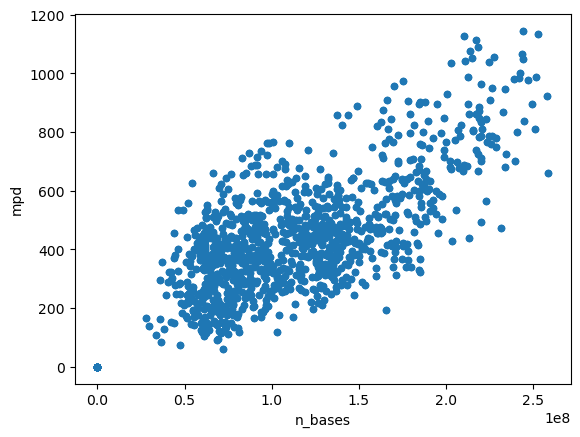

In [119]:
pd.DataFrame({'mpd':mpd_all_flat,'n_bases':n_bases_all_flat}).plot(y='mpd',x='n_bases',kind='scatter')
plt.savefig('../script_results/plots/mpd_n_bases_Neanderthal.png')
pd.DataFrame({'mpd':mpd_all_flat,'n_bases':n_bases_all_flat}).to_csv('../script_results/tables/mpd_n_bases_Neanderthal.txt',sep='\t',index=False,header=True)#plot(y='mpd',x='n_bases',kind='scatter')